In [59]:
from Bio import SeqIO
import subprocess, shlex
import sys
sys.path.append('./src/')
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
import smallpars
import glob

In [61]:
folders = ['./examples/ORCO_Chemoreceptors/' , './examples/sas6/round2/sp_sas6/' , './examples/RRNPP/round2/all/' ]
folders += glob.glob('./examples/fsx1/*/')
print(folders)

['./examples/ORCO_Chemoreceptors/', './examples/sas6/round2/sp_sas6/', './examples/RRNPP/round2/all/', './examples/fsx1/2/', './examples/fsx1/48/', './examples/fsx1/14/', './examples/fsx1/9/', './examples/fsx1/28/', './examples/fsx1/44/', './examples/fsx1/7/', './examples/fsx1/8/', './examples/fsx1/50/', './examples/fsx1/34/', './examples/fsx1/27/', './examples/fsx1/39/', './examples/fsx1/38/', './examples/fsx1/26/', './examples/fsx1/30/', './examples/fsx1/1/', './examples/fsx1/17/', './examples/fsx1/43/', './examples/fsx1/42/', './examples/fsx1/22/', './examples/fsx1/25/', './examples/fsx1/20/', './examples/fsx1/5/', './examples/fsx1/32/', './examples/fsx1/40/', './examples/fsx1/15/', './examples/fsx1/21/', './examples/fsx1/23/', './examples/fsx1/13/', './examples/fsx1/10/', './examples/fsx1/31/', './examples/fsx1/6/', './examples/fsx1/51/', './examples/fsx1/41/', './examples/fsx1/11/', './examples/fsx1/18/', './examples/fsx1/0/', './examples/fsx1/24/', './examples/fsx1/37/', './examp

In [62]:
import pandas as pd
from ete3 import ncbi_taxonomy
import toytree
import colour
import sys
#create a legend for the colors using matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
#make a list of the patches
import toyplot.svg

sys.path.append('./src/')
#drwa tree with a large figure size


for folder in folders:
    print(folder)

    seqdf = pd.read_csv(folder +'sequence_dataset.csv')
    print(seqdf.columns)
    print(seqdf['Taxonomic lineage (Ids)'])
    seqdf['linIDs'] = seqdf['Taxonomic lineage (Ids)'].map(lambda x : set( x.split(',') ) )
    print(seqdf.linIDs)
    seqdf['phylum'] = seqdf.linIDs.map(lambda x : [s.split()[0] for s in x if '(phylum)' in s]  )
    print(seqdf.phylum)
    seqdf['order'] = seqdf.linIDs.map(lambda x : [s.split()[0] for s in x if '(class)' in s]  )
    print(seqdf.order)

    ncbi = ncbi_taxonomy.NCBITaxa()

    translator = ncbi.get_taxid_translator([ o[0] for o in seqdf.order if len(o) > 0 ])
    seqdf['order_name'] = seqdf.order.map(lambda x : translator[int(x[0])] if len(x)> 0 else 'NA' )
    print(seqdf.order_name)
    print(translator)

    tre = toytree.tree(folder +'core_tree.nwk.PP.nwk.rooted')
    orderlabel = dict(zip(seqdf['Entry'],seqdf.Organism))
    tiplabels = [ l +' '+ orderlabel.get(l,l) for l in tre.get_tip_labels() ]
    #create a unique hex color for each order
    order_colors = colour.Color("red").range_to(colour.Color("blue"),len(set(seqdf['order_name'])))
    order_colors = { o : c.hex for o,c in zip(set(seqdf['order_name']),order_colors) }
    print(order_colors)
    #assign colors to each sequence in seqdf based on order
    seqdf['order_color'] = seqdf['order_name'].map(lambda x : order_colors[x] if x != 'NA' else '#000000' )
    print(seqdf['order_color'])
    cmapper = { l : c for l,c in zip(seqdf['Entry'],seqdf['order_color']) }
    colorvec = [ cmapper.get(l,'#000000') for l in tre.get_tip_labels() ]
    print(len(seqdf.Entry.unique()))
    print(len(tre.get_tip_labels()))
    print(len(colorvec))
    canvas, axes, mark = tre.draw(tip_labels=tiplabels, tip_labels_colors=colorvec, width=1500, height=5000 )
    toyplot.svg.render(canvas, folder  +"order_tree-plot.svg")
    patches = [ mpatches.Patch(color=c, label=l) for l,c in order_colors.items() ]
    #make a legend
    plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )
    plt.savefig(folder+'tree_legend.svg', bbox_inches='tight')
    plt.show()
    


./examples/ORCO_Chemoreceptors/
Index(['Unnamed: 0', 'Entry Name', 'Entry', 'Gene Names', 'Protein names',
       'Reviewed', 'Protein names.1', 'Organism', 'Taxonomic lineage (Ids)',
       'Sequence', 'query'],
      dtype='object')
0       2015172 (genus), 213859 (subfamily), 36668 (fa...
1       604375 (genus), 141711 (tribe), 43085 (subfami...
2       32351 (no rank), 32346 (no rank), 32341 (subge...
3       32351 (no rank), 32346 (no rank), 32341 (subge...
4       32351 (no rank), 32346 (no rank), 32341 (subge...
                              ...                        
1425    32351 (no rank), 32346 (no rank), 32341 (subge...
1426    32351 (no rank), 32346 (no rank), 32341 (subge...
1427    32351 (no rank), 32346 (no rank), 32341 (subge...
1428    32351 (no rank), 32346 (no rank), 32341 (subge...
1429    32351 (no rank), 32346 (no rank), 32341 (subge...
Name: Taxonomic lineage (Ids), Length: 1430, dtype: object
0       { 7496 (subclass),  33208 (kingdom),  6656 (ph...
1       { 

KeyboardInterrupt: 

Index(['uniprot_id', 'dataset', 'genomic_accession', 'species', 'strain',
       'genomic_context', 'intergenic_distance', 'receptor_id',
       'grp_identical_proteins', 'rep_sequence', 'receptor_family', 'r_start',
       'r_end', 'r_strand', 'TPR_hmm_name', 'TPR_hmm_accession',
       'TPR_hmm_coverage', 'TPR_hmm_evalue', 'HTH_hmm_name',
       'HTH_hmm_accession', 'HTH_hmm_coverage', 'HTH_hmm_evalue',
       'homologous_ref_receptor', 'blastp_evalue', 'perc_identity',
       'perc_cover', 'propeptide_id', 'p_start', 'p_end', 'p_strand',
       'p_RBS_bin', 'p_RBS_motif', 'p_RBS_spacer', 'Prediction',
       'propeptide_score', 'SP(Sec/SPI)', 'TAT(Tat/SPI)', 'LIPO(Sec/SPII)',
       'OTHER', 'CS_Position', 'qss_id', 'genetic_element',
       'Phaster_prophage_prediction', 'prophage_region', 'taxid', 'lineage',
       'class', 'order', 'family', 'genus'],
      dtype='object')
receptor_family
{'subfam_27': '#f00', 'subfam_10': '#ff2100', 'subfam_08': '#ff4200', 'subfam_03_PlcR': '#ff

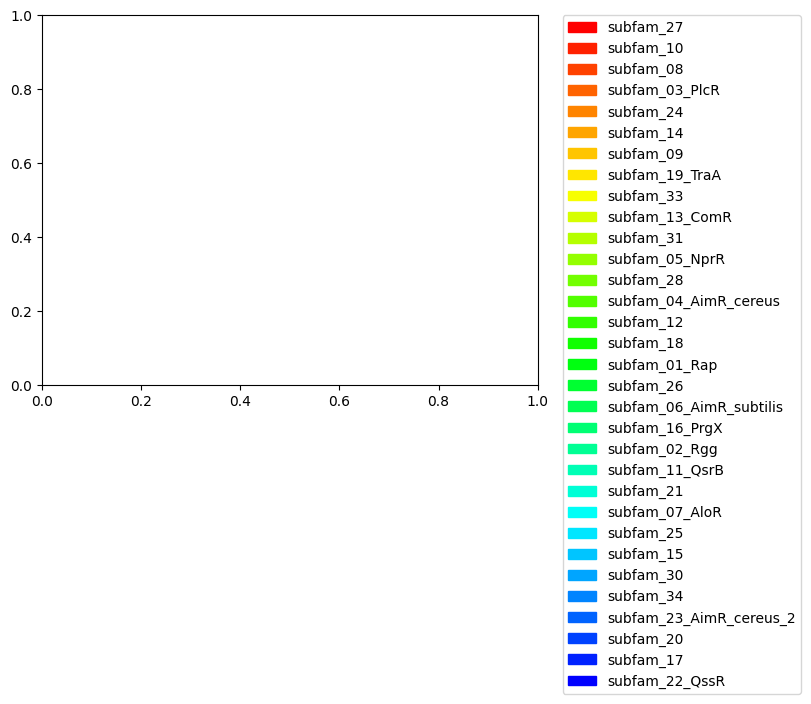

homologous_ref_receptor
{'Rgg2_[S._pyogenes]': '#f00', 'AimR_[B._phage_phi3T]': '#f50', 'PlcR_[B._cereus]': '#fa0', 'AloR13_[P._polymyxa]': '#ff0', 'RopB_[S._pyogenes]': '#af0', 'AimR-like_[B._phage_Waukesha]': '#5f0', 'TraA_[E._faecalis_plasmid]': '#0f0', 'QssR5_[C._saccharoperbutylacetonicum]': '#0f5', 'QsrB_[C._acetobutylicum]': '#0fa', nan: '#0ff', 'PrgX_[E._faecalis_plasmid]': '#0af', 'NprR_[B._thuringensis]': '#05f', 'RapA_[B._subtilis]': '#00f'}
0      #0ff
1      #00f
2      #00f
3      #00f
4      #00f
       ... 
857    #0ff
858    #0ff
859    #0ff
860    #0ff
861    #0ff
Name: order_color, Length: 862, dtype: object
770
770


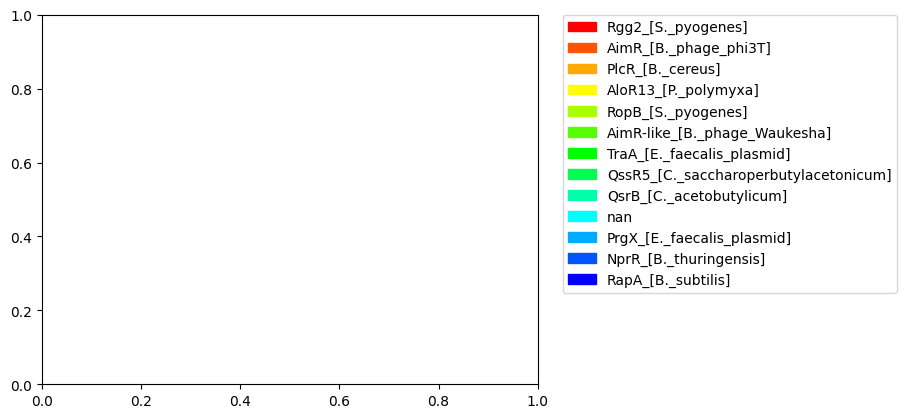

p_RBS_motif
{'AGGGGG': '#f00', 'GGGGG': '#ff4e00', 'GGAGG': '#ff9d00', 'GGCGG': '#ffeb00', 'AGAAGG': '#c4ff00', 'AGGA': '#76ff00', 'AGGAGG': '#27ff00', 'AGTAGG': '#00ff27', 'AGGAG': '#00ff76', 'GGAG': '#00ffc4', nan: '#00ebff', 'GGTGG': '#009dff', 'AGGTGG': '#004eff', 'GAGG': '#00f'}
0      #00ff76
1      #00ff76
2      #00ffc4
3      #00ff76
4      #00ff76
        ...   
857    #00ebff
858    #00ebff
859    #00ebff
860    #ff4e00
861    #00ebff
Name: order_color, Length: 862, dtype: object
770
770


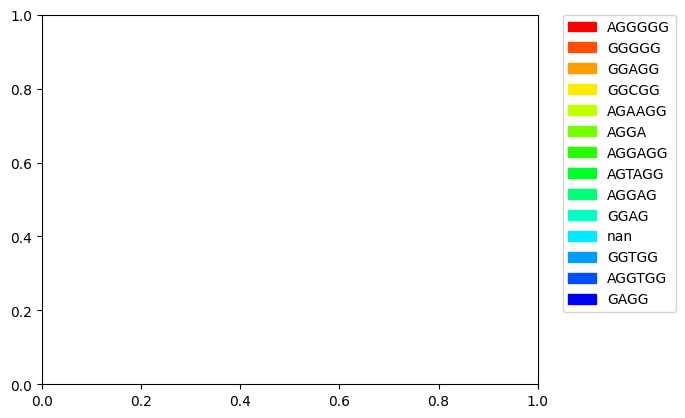

dataset
{'Firmicutes': '#f00', 'Viruses': '#00f'}
0      #f00
1      #f00
2      #f00
3      #f00
4      #f00
       ... 
857    #f00
858    #f00
859    #f00
860    #f00
861    #f00
Name: order_color, Length: 862, dtype: object
770
770


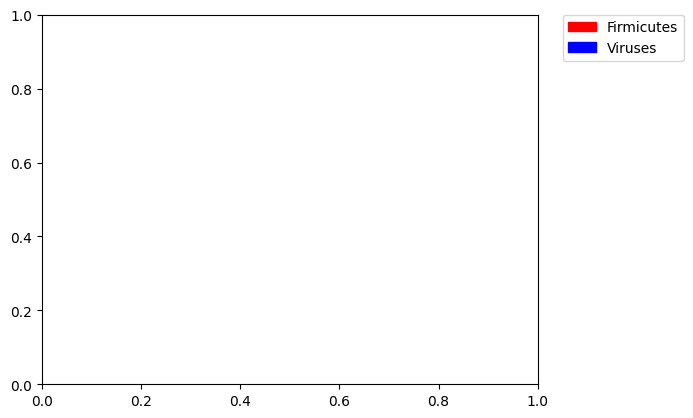

In [ ]:
folder = 'examples/RRNPP/round2/all/'
labels = pd.read_table('./examples/RRNPP/round2/metadata.tsv')
print(labels.columns)
labels_select = ['receptor_family'  , 'homologous_ref_receptor' , 'p_RBS_motif' ,'dataset'   ]

for l in labels_select:
        
    print(l)


    tre = toytree.tree(folder +'core_tree.nwk.PP.nwk.rooted')
    orderlabel = dict(zip(labels['uniprot_id'],labels[l]))
    tiplabels = [ str(l) +' '+ str(orderlabel.get(l,l) ) for l in tre.get_tip_labels() ]
    #create a unique hex color for each order


    order_colors = colour.Color("red").range_to(colour.Color("blue"),len(set(labels[l])))
    order_colors = { o : c.hex for o,c in zip(set(labels[l]),order_colors) }
    print(order_colors)
    #assign colors to each sequence in seqdf based on order
    labels['order_color'] = labels[l].map(lambda x : order_colors[x] if x != 'NA' else '#000000' )
    print(labels['order_color'])

    cmapper = { l : c for l,c in zip(labels['uniprot_id'],labels['order_color']) }
    colorvec = [ cmapper.get(l,'#000000') for l in tre.get_tip_labels() ]

    print(len(tre.get_tip_labels()))
    print(len(colorvec))

    canvas, axes, mark = tre.draw(tip_labels=tiplabels, tip_labels_colors=colorvec, width=1500, height=5000)
    patches = [ mpatches.Patch(color=c, label=l) for l,c in order_colors.items() ]
    toyplot.svg.render(canvas, folder  + l +"_tree-plot.svg")

    #make a legend
    plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )
    plt.savefig(folder+ l +'_tree_legend.svg', bbox_inches='tight')
    plt.show()

In [2]:
#grab identifiers
import ete3
import numpy as np



In [ ]:



tree1 = ete3.Tree('./examples/RRNPP/round2/all/struct_0_tree.nwk.PP.nwk.rooted', format=1)
#use ete3 to calculat distance matrix between leaves
m1 = np.zeros((len(tree1.get_leaves()), len(tree1.get_leaves())))
for i, leaf1 in enumerate(tree1.get_leaves()):
    for j, leaf2 in enumerate(tree1.get_leaves()):
        if i == j:
            m1[i,j] = 0
        else:
            m1[i,j] = tree1.get_distance(leaf1, leaf2)



In [3]:
order = { l : i for i,l in enumerate(tree1.get_leaf_names()) }

In [4]:

tree3 = ete3.Tree('./examples/RRNPP/round2/all/struct_2_tree.nwk.PP.nwk.rooted', format=1)
#use ete3 to calculat distance matrix between leaves
m3 = np.zeros((len(tree1.get_leaves()), len(tree1.get_leaves())))
for i, leaf1 in enumerate(tree3.get_leaves()):
    for j, leaf2 in enumerate(tree3.get_leaves()):
        if i == j:
            m3[order[leaf1.name],order[leaf2.name]] = 0
        else:
            m3[order[leaf1.name],order[leaf2.name]] = tree3.get_distance(leaf1, leaf2)

In [5]:
tree2 = ete3.Tree('./examples/RRNPP/round2/all/sequences.aln.fst.nwk', format=1)
#use ete3 to calculat distance matrix between leaves
m2 = np.zeros((len(tree1.get_leaves()), len(tree1.get_leaves())))
for i, leaf1 in enumerate(tree2.get_leaves()):
    for j, leaf2 in enumerate(tree2.get_leaves()):
        if leaf1.name in order and leaf2.name in order:
            if i == j:
                m2[order[leaf1.name],order[leaf2.name]] = 0
            else:
                m2[order[leaf1.name],order[leaf2.name]] = tree2.get_distance(leaf1, leaf2)


In [6]:
np.save( './examples/RRNPP/round2/all/struct_0.dist.npy', m1)
np.save( './examples/RRNPP/round2/all/struct_2.dist.npy', m3)
np.save( './examples/RRNPP/round2/all/struct_1.dist.npy', m2)

In [16]:
aln = './examples/RRNPP/round2/all/sequences.aln.fst'

alndist = np.zeros((   len(tree1.get_leaves()), len(tree1.get_leaves()) ))
import Bio.SeqIO

for i, seq1 in enumerate(Bio.SeqIO.parse(aln, 'fasta')):
    for j, seq2 in enumerate(Bio.SeqIO.parse(aln, 'fasta')):
        if i == j:
            alndist[order[seq1.id],order[seq2.id]] = 0
        elif i < j:
            alndist[order[seq1.id],order[seq2.id]] = sum([ 1 if seq1.seq[k] == seq2.seq[k] and seq2.seq[k] != '-' and seq1.seq[k] != '-' else 0 for k in range(len(seq1.seq)) ])
            / max(len(seq1.seq.replace('-','')),len(seq2.seq.replace('-','')))
alndist += alndist.T


In [20]:
np.save( './examples/RRNPP/round2/all/alndist.dist.npy', alndist)


In [3]:
alndist = np.load( './examples/RRNPP/round2/all/alndist.dist.npy')
m1 = np.load( './examples/RRNPP/round2/all/struct_0.dist.npy')
m2 = np.load( './examples/RRNPP/round2/all/struct_1.dist.npy')
m3 = np.load( './examples/RRNPP/round2/all/struct_2.dist.npy')

In [4]:
print(alndist.shape)

(770, 770)


In [5]:
#make a dictionary of the distance matrices
distdict = { 'mode 0' : m1, 'sequences' : m2, 'mode 2' : m3, 'aln identity' : alndist }

In [6]:
distdict['mode 2 exp'] = np.exp( 3 * m3 )

mode 0 , sequences


<Figure size 1000x1000 with 0 Axes>

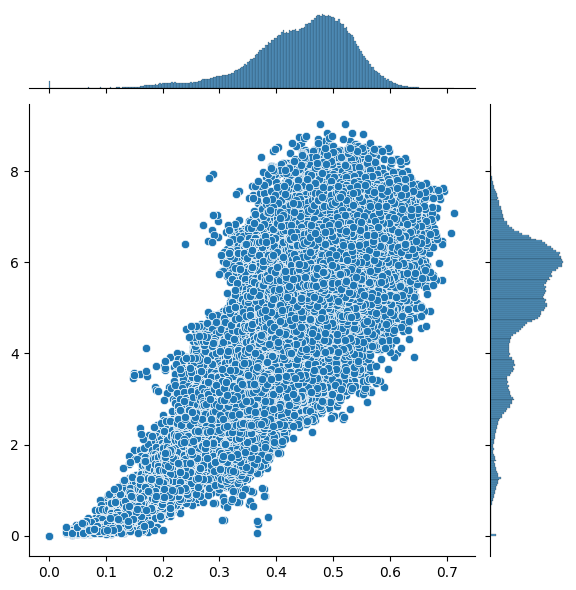

mode 0 , mode 2


In [7]:
#grab identifiers
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#plot the flattened distance matrices relative to each other with seaborn
for mat1,mat2 in itertools.combinations(distdict,2):
    print(mat1, ',' ,mat2)
    plt.figure(figsize=(10,10))

    #
    sns.jointplot(x = distdict[mat1].flatten() , y = distdict[mat2].flatten() , alpha=0.05 )
    
    plt.savefig('./examples/RRNPP/round2/all/' + mat1 + '-' + mat2 + '.svg', bbox_inches='tight')
    plt.show()
   

    

In [26]:
import scipy.stats as stats
stats.pearsonr(m2.flatten(), m1.flatten())

PearsonRResult(statistic=0.840037037369748, pvalue=0.0)